# ANALYSIS - TEAMS
- Gráfico de cajas de puntos de cada equipo
- Gráfico de barras de puntos, ensayos, tries, 
    - Por partido/por rival 
    - A favor 
    - En contra
- Ratio de ensayos convertidos (pie chart) 
- Visualización de golpes de castigo 
    - A favor -> estimación de golpes que sacan a favor
    - En contra -> estimación de golpes que generan en contra 
- Histograma de puntos, ensayos, por tiempo en el partido 
- Alineación 
    - Toda la liga
    - Últimos 5 partidos/fase de ascenso 
- Gráfico de barras de número de jugadores en convocatoria 
- Histograma de sustituciones 
- Sustituciones habituales 

In [1]:
#Import the needed libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from teams_functions import *

Matplotlib is building the font cache; this may take a moment.
/Users/sistemas/Documents/GitHub/Rugby-Data-Analysis-Project/teams_functions.py:201: SyntaxWarning: invalid escape sequence '\d'
  local_lineup = matches_df.iloc[i].filter(regex='local_team_player_\d{2}_jersey')
/Users/sistemas/Documents/GitHub/Rugby-Data-Analysis-Project/teams_functions.py:202: SyntaxWarning: invalid escape sequence '\d'
  visitor_lineup = matches_df.iloc[i].filter(regex='visitor_team_player_\d{2}_jersey')


In [2]:
teams_df = pd.read_csv('teams_df.csv', sep=';')
teams_df.head()

,match_number,division,date,match_time,match_pitch,team,rival_team,as_local,referee_license,team_player_01_jersey,...,penalty_kick,drop,penalty_try,rival_try,rival_conversion,rival_penalty_kick,rival_drop,rival_penalty_try,team_players,rival_team_players
0,1,2A,2024-10-05,13:00:00,Universidad Alfonso X el Sabio,C.R Majadahonda,Canal Red Vallecas Rugby Union,1,1236990,1.0,...,0,0,0,1,0,0,0,0,23,18
1,2,2A,2024-10-13,12:00:00,Campo de Paraninfo,C.R Majadahonda,Complutense Cisneros Palito V,0,1249588,1.0,...,0,0,0,0,0,1,0,0,23,22
2,3,2A,2024-10-26,11:30:00,Campo de Majadahonda (Valle del Arcipreste),C.R Majadahonda,Aeronáuticos,1,1214957,1.0,...,0,0,0,1,1,0,0,0,23,15
3,4,2A,2024-11-09,20:00:00,Campo de las Rozas (El Cantizal),C.R Majadahonda,Industriales C SlashMobility Las Rozas,0,1236990,1.0,...,1,0,0,3,2,0,0,0,23,20
4,5,2A,2024-11-16,15:00:00,Universidad Alfonso X el Sabio,C.R Majadahonda,Jabatos Móstoles R.C.,1,1246948,1.0,...,0,0,0,1,0,0,0,0,23,19


# 1. SELECCIÓN DE EQUIPO
HORTALEZA

In [3]:
#Generate a dictionary with the teams and their respective index
teams_dict = {}

for i in enumerate(teams_df['team'].unique()): 
    teams_dict.update({i[0]: i[1]})

#Select the team to study
team_to_study = teams_dict[2]
team_df = teams_df[teams_df['team'] == team_to_study].copy()
print(team_to_study)

XV Hortaleza Rojo 


## 2. ANÁLISIS DE MARCADOR
### 2.1. COMPARATIVA CON LOS DEMÁS EQUIPOS
- Visualización de todos los resultados de los equipos. 
- Visualización de puntos, ensayos, tries, 
    - Gráfico de barras
    - Por partido/por rival 
    - A favor 
    - En contra

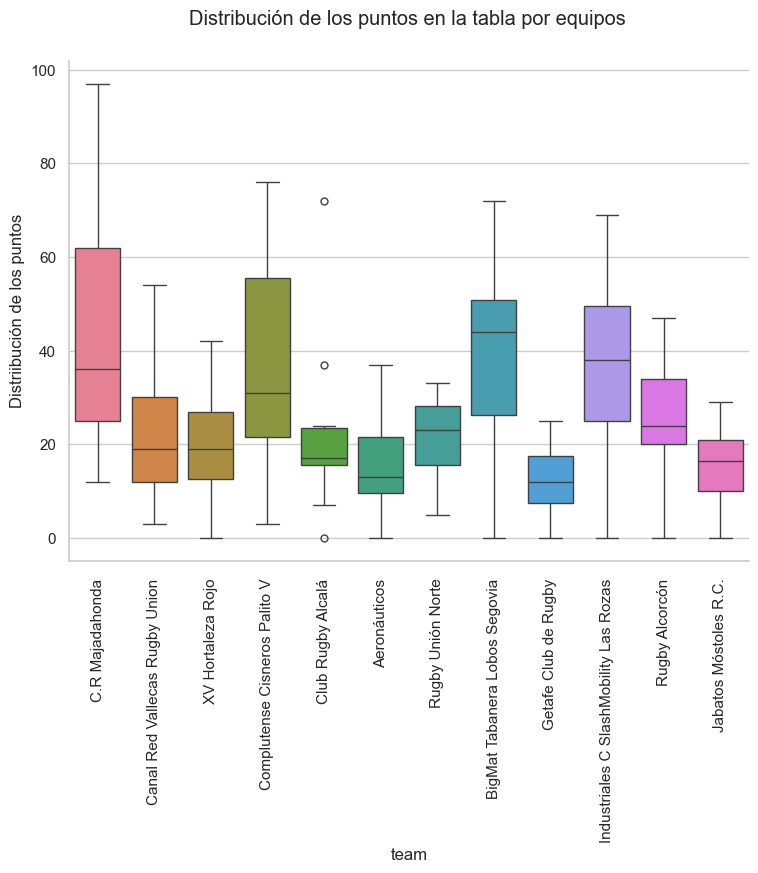

In [4]:
sns.set(style='whitegrid')
g = sns.catplot(x='team', y='scoreboard_points', data=teams_df, kind='box', hue='team')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribución de los puntos en la tabla por equipos', y=1.05)
g.set_ylabels('Distriibución de los puntos')
#Adjust the plot size
g.fig.set_size_inches(10, 6)
#plt.tight_layout()
plt.show()

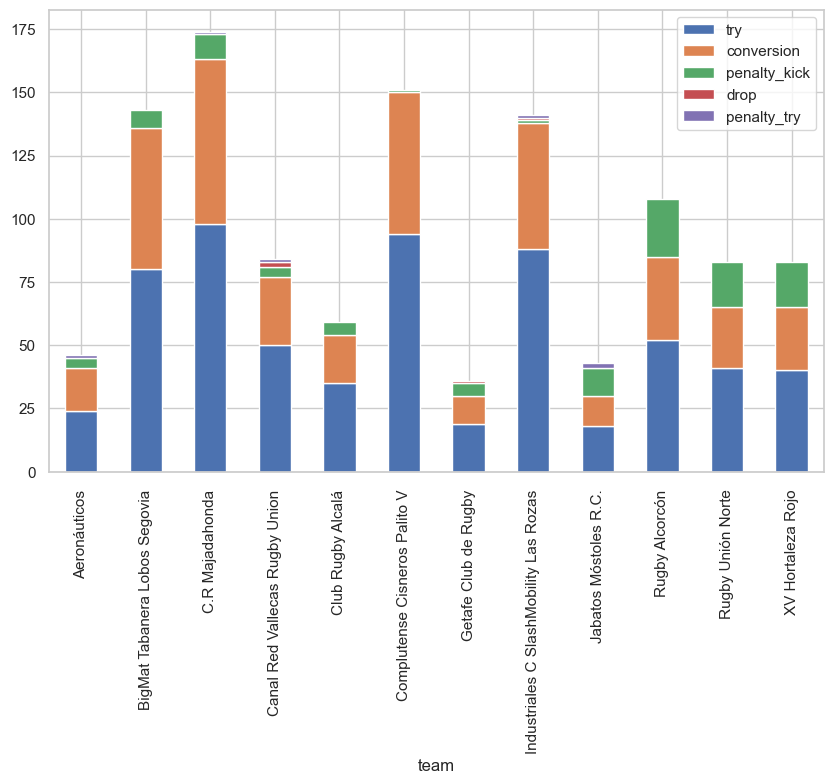

In [5]:
#Counplot de ensayos, conversiones, golpes de castigo y ensayos de castigo
x = 'team'
y = ['try', 'conversion', 'penalty_kick', 'drop', 'penalty_try']

teams_df.groupby('team').sum().reset_index().plot(kind='bar', x=x, y=y, stacked=True, figsize=(10, 6))
plt.xticks(rotation=90)
plt.show()


### 2.2. RESULTADOS DEL EQUIPO 
- Marcador contra el resto de equipos
- Ratio de ensayos convertidos (pie chart) 
- Visualización de golpes de castigo 
    - A favor -> estimación de golpes que sacan a favor
    - En contra -> estimación de golpes que generan en contra 
- Histograma de puntos, ensayos, por tiempo en el partido 

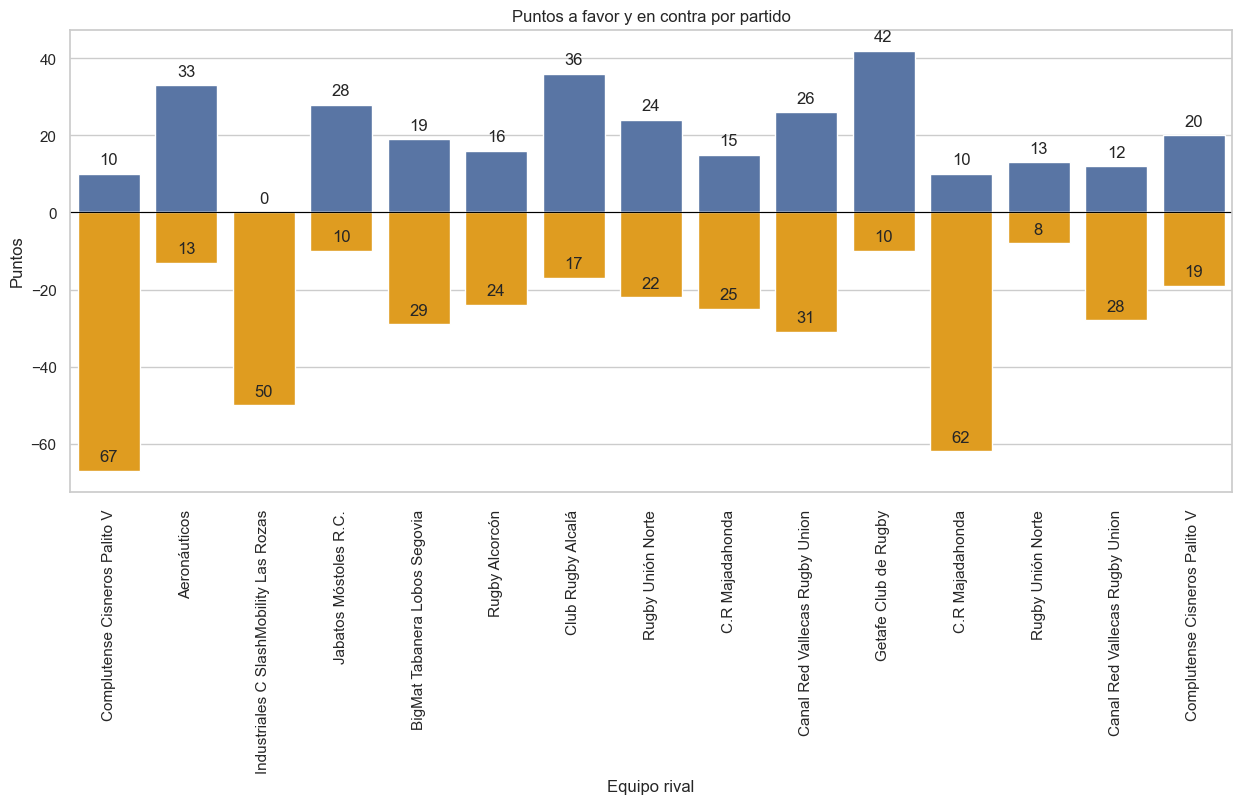

In [6]:
season_scoreboard(team_df)

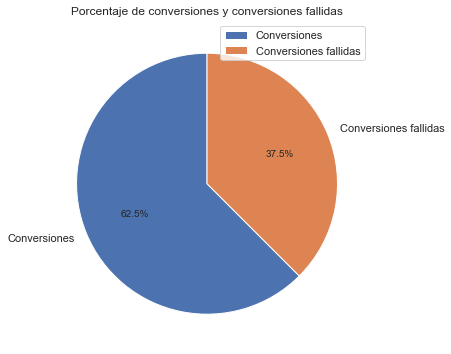

In [12]:
#Pie chart de ensayos y conversiones
#Crea una serie con las conversiones fallidas
team_df['failed_conversion'] = team_df['try'] - team_df['conversion']

plt.figure(figsize=(10, 6))
plt.pie([team_df['conversion'].sum(), team_df['failed_conversion'].sum()], labels=['Conversiones', 'Conversiones fallidas'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de conversiones y conversiones fallidas')
plt.legend()
plt.show()

Distribución de los puntos anotados a favor y en contra a lo largo de la temporada por ventanas de 10 minutos. 

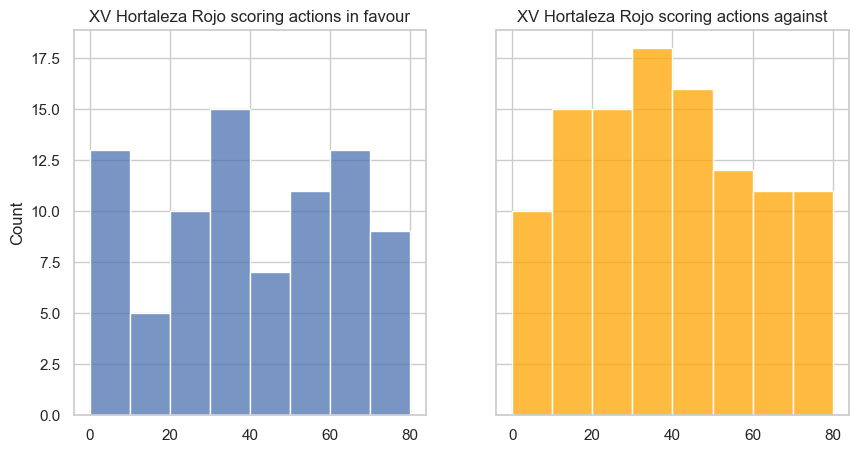

In [7]:
points_to_histogram(team_df, team_to_study)

Distribución de los ensayos y los golpes de castigo anotados a lo largo de la temporada por ventanas de 10 minutos. 

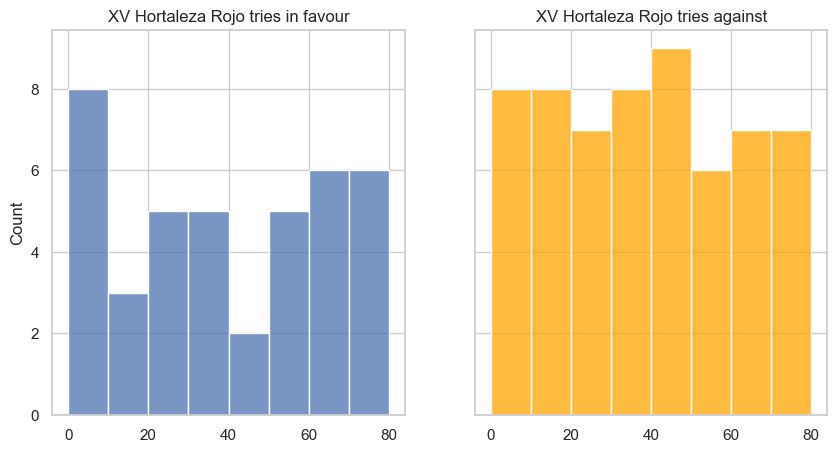

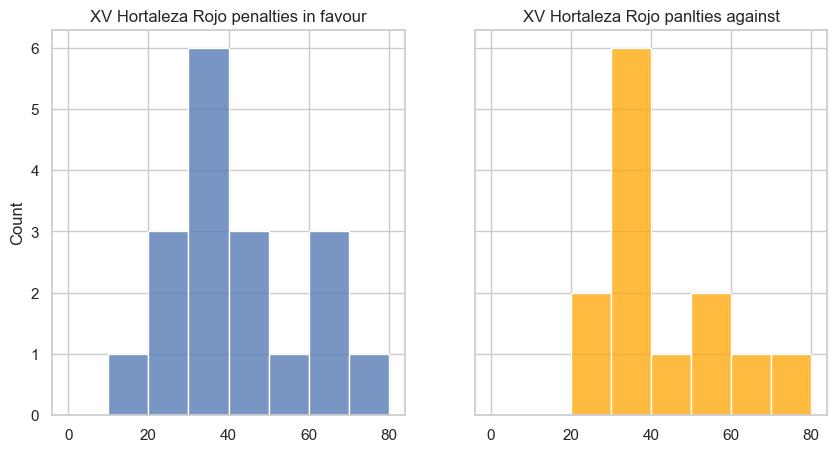

In [8]:
tries_to_histogram(team_df, team_to_study)

# 3. ANÁLISIS DE ALINEACIONES
- Número de jugadores por convocatoria 
- Alineación habitual
    - Toda la liga
    - Últimos partidos/fase de ascenso 
- Gráfico de barras de número de jugadores en convocatoria 
- Histograma de sustituciones 
- Sustituciones habituales 

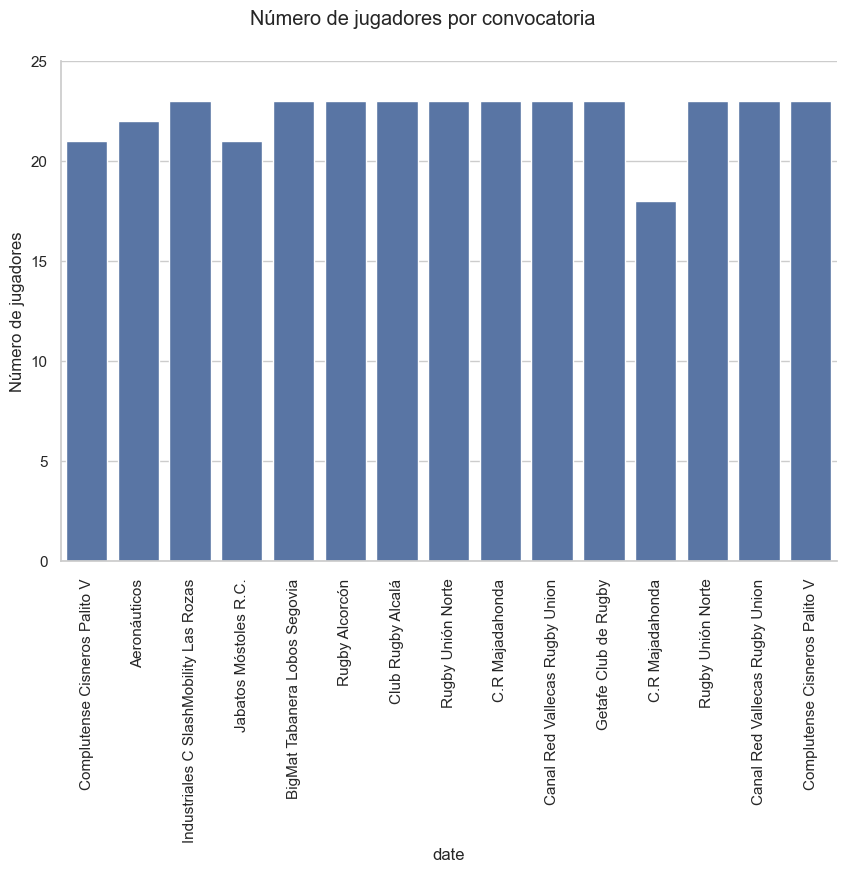

In [9]:
#Número de jugadores por convocatoria 
g = sns.catplot(x='date', y='team_players', data=team_df, kind='bar', hue='team', errorbar=None, legend=False)
g.set_xticklabels(team_df['rival_team'], rotation=90)
g.set(ylim=(0, 25))
g.figure.suptitle('Número de jugadores por convocatoria', y=1.05)
g.set_ylabels('Número de jugadores')
g.figure.set_size_inches(10, 6)
plt.show() 

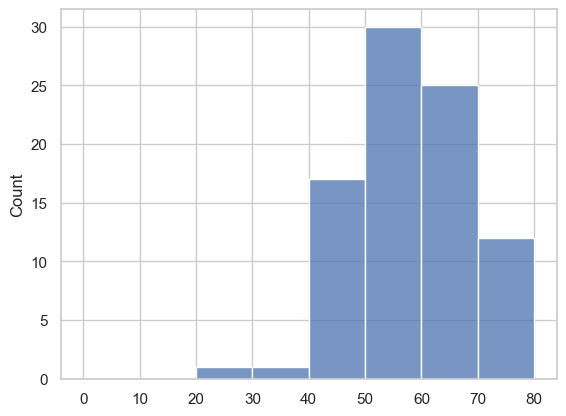

In [10]:
#Todos los partidos
subs_to_histogram(team_df, 0)

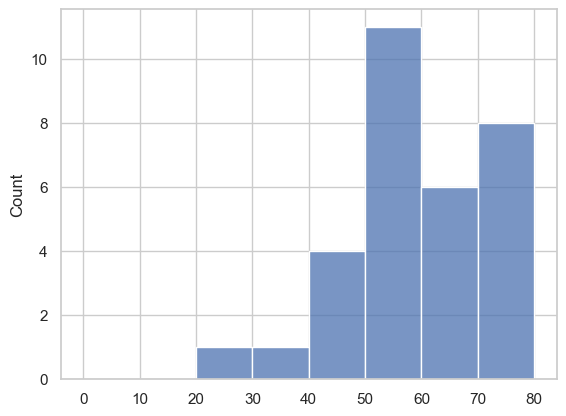

In [11]:
#Los 4 últimos partidos	(fase 2 Ascenso)
subs_to_histogram(team_df, 4)

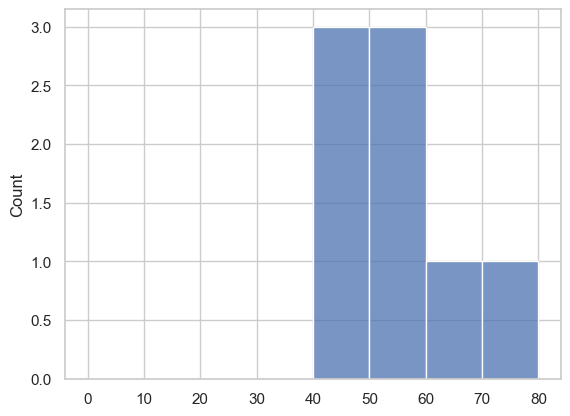

In [12]:
#El último partdo
subs_to_histogram(team_df, 1)